# Imports

In [1]:
import re
import pathlib
import numpy as np
import pandas as pd
import vextract.unwrap
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

# Make plots interactive.
%matplotlib widget

# Load all the data

In [2]:
'''
Load Be22Re data.
'''

df_ext = pd.read_csv('../data/extracted_data/Be22Re-Fig3/15_GPa.csv')
df_raw = pd.read_csv('../data/source_data/31_ReBe22_OmniDAC_Run1_15p0bar_14p9GPa_Warming_At5K_Withoutlaser_V34I25_0p1mA', sep='\t')

# Fig. 3 reported the resistivity normalized to the value at 10 K.
# Here we get the value of resistance at 10 K.
R_10K = df_raw[df_raw['T(K)'] > 10]['R(Ohms)'].iloc[0]

# Compute the normalized resistance.
df_raw['rho_n'] = df_raw['R(Ohms)'] / R_10K

# Fig. 3 spans 5 K to 9 K, but the raw data goes all the way to 15 K.
# Here, I trim at data below 5 K and above 9 K to make plotting
# more convenient.  The 4.999 rather than 5 is to account for precision
# error in the extraction.
mask = df_raw['T(K)'].between(4.999, 9)
df_raw = df_raw[mask].reset_index().copy()

In [3]:
'''
Load CSH-Fig1a data and define relevant information
'''

# Load the already extracted data from files
data_dir = pathlib.Path.cwd().parent / 'data' / 'extracted_data' / 'CSH-Fig1a'
data_dict = {}
for file in data_dir.iterdir():
    pressure = re.findall('\d{3}', file.name)[0]
    data_dict[pressure] = pd.read_csv(file)

# Make an association between pressure and run number for Fig 1a
runs = {'174': 'Run 1',
        '220': 'Run 1',
        '243': 'Run 2',
        '258': 'Run 2',
        '267': 'Run 2',
        '210': 'Run 3',
        '250': 'Run 3'}

In [4]:
'''
Load CSH-Fig2b data and define relevant information
'''

# Load the already extracted data from files
mag_dir = pathlib.Path.cwd().parent / 'data' / 'extracted_data' / 'CSH-Fig2b'
mag_dict = {}
for file in mag_dir.iterdir():
    field = re.findall('0(\d)', file.name)[0]
    mag_dict[field] = pd.read_csv(file)

# Plots for article

## Figure 2

Comparison of extracted and raw data for Be22Re.

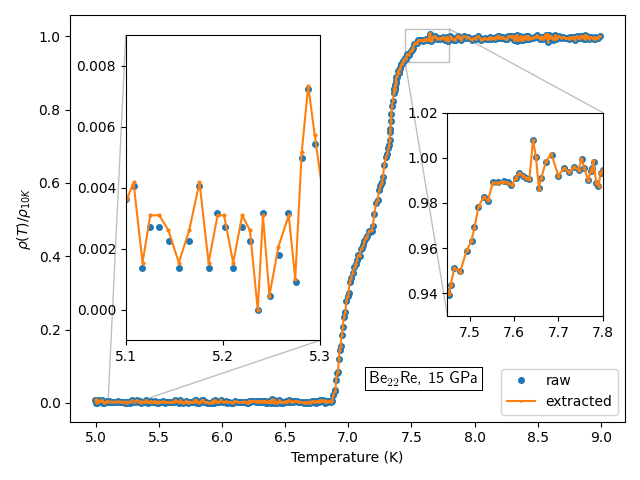

In [5]:
'''
Figure 2 of article.
Comparing extracted and raw data from Figure 3 of:
PHYSICAL REVIEW B 104, 064505 (2021)
'''

fig, ax = plt.subplots()

ax.plot(df_raw['T(K)'], df_raw.rho_n, 'o', markersize=4, label='raw')
ax.plot(df_ext.Temp, df_ext.rho_n, '-o', markersize=1, label='extracted')

axIns1 = ax.inset_axes([0.1, 0.2, 0.35, 0.75])
axIns1.set_xlim(5.1, 5.3)
axIns1.set_ylim(-0.001, 0.009)
axIns1.plot(df_raw['T(K)'], df_raw.rho_n, 'o', markersize=4, label='raw')
axIns1.plot(df_ext.Temp, df_ext.rho_n, '-o', markersize=2, label='extracted')
ax.indicate_inset_zoom(axIns1, edgecolor='grey')

axIns2 = ax.inset_axes([0.68, 0.26, 0.28, 0.5])
axIns2.set_xlim(7.45, 7.8)
axIns2.set_ylim(0.93, 1.02)
axIns2.plot(df_raw['T(K)'], df_raw.rho_n, 'o', markersize=4, label='raw')
axIns2.plot(df_ext.Temp, df_ext.rho_n, '-o', markersize=2, label='extracted')
ax.indicate_inset_zoom(axIns2, edgecolor='grey')

ax.set_xlabel('Temperature (K)')
ax.set_ylabel(r'$\rho(T)/\rho_{10 K}$')
ax.legend(loc='lower right')

fig.text(0.57, 0.20, r'\fbox{\large{Be$_{22}$Re, 15 GPa}}', usetex=True)

fig.tight_layout()

plt.savefig(pathlib.Path.cwd().parent / 'publication_figures' / 'Fig02.pdf')

## Figure 3: For comparison with CSH-Fig2a

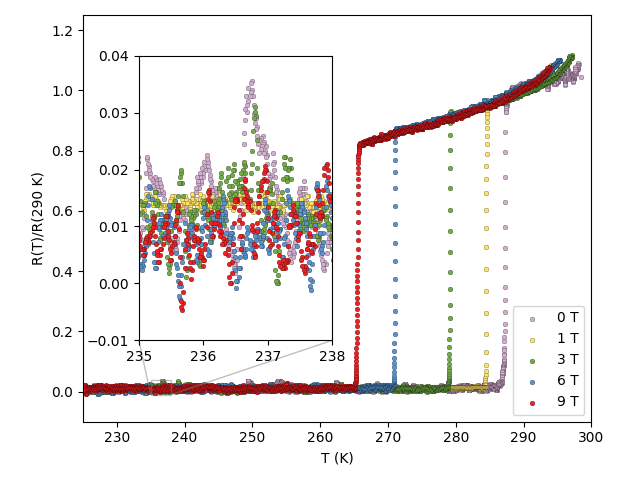

In [6]:
'''
Figure 3 of article.
Reploted version of CSH-Fig2b with zoomed region.
'''

colors = ['#d4aed1',
          '#fde368',
          '#73ab47',
          '#5994cf',
          '#eb2123']

fields = ['0',
          '1',
          '3',
          '6',
          '9']

legend = dict(zip(fields, colors))

fig, ax = plt.subplots()
axIns = ax.inset_axes([0.11, 0.2, 0.38, 0.7])

for field in fields:
    df = mag_dict[field]
    ax.scatter(df['Temp'], df['R'],
               color=legend[field],
               label=f'{field} T',
               s=12,
               linewidth=0.15,
               marker='o',
               edgecolor='black')
    axIns.scatter(df['Temp'], df['R'],
                  color=legend[field],
                  label=f'{field} T',
                  s=12,
                  linewidth=0.15,
                  marker='o',
                  edgecolor='black')

ax.set_xlim(225, 300)
ax.set_ylim(-0.1, 1.25)
ax.set_xlabel('T (K)')
ax.set_ylabel('R(T)/R(290 K)')
axIns.set_xlim(235, 238)
axIns.set_ylim(-0.01, 0.04)
ax.indicate_inset_zoom(axIns, edgecolor='grey')
ax.legend()
ax.set_box_aspect(0.8)
plt.tight_layout()
plt.savefig(pathlib.Path.cwd().parent / 'publication_figures' / 'Fig03.pdf')

595    291.843713
Name: Temp, dtype: float64

560    291.652105
Name: Temp, dtype: float64

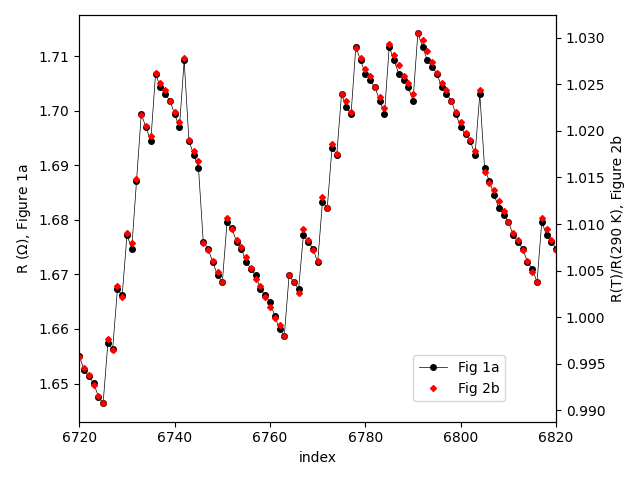

In [7]:
'''
Figure 4 of publication.
Comparison of data extracted from CSH-Fig1a and CSH-Fig2b.
'''

dfP = data_dict['267']
dfM = mag_dict['0']
dfP['newIndex'] = (-dfP.index + 35) + 7380
dfM['newIndex'] = -dfM.index + 7380

fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.set_xlabel('index')
ax.set_ylabel('R ($\Omega$), Figure 1a')
ax2.set_ylabel('R(T)/R(290 K), Figure 2b')

ax.plot(dfP['newIndex'][(6719 < dfP['newIndex']) & (6821 > dfP['newIndex'])],
        dfP['R'][(6719 < dfP['newIndex']) & (6821 > dfP['newIndex'])],
        '-o',
        markersize=4,
        color='black',
        linewidth=0.5,
        label='Fig 1a')
ax2.plot(dfM['newIndex'][(6719 < dfM['newIndex']) & (6821 > dfM['newIndex'])],
         dfM['R'][(6719 < dfM['newIndex']) & (6821 > dfM['newIndex'])],
         'D',
         markersize=3,
         color='red',
         linewidth=0.5,
         label='Fig 2b')

fig.legend(loc='lower right', bbox_to_anchor=(0.8, 0.15))
plt.tight_layout()

ax.set_xlim(6720, 6820)
plt.savefig(pathlib.Path.cwd().parent / 'publication_figures' / 'Fig04.pdf')

# Display the temperature range of the data shown in the plot.
display(dfP['Temp'][dfP['newIndex'] == 6820])
display(dfM['Temp'][dfM['newIndex'] == 6820])

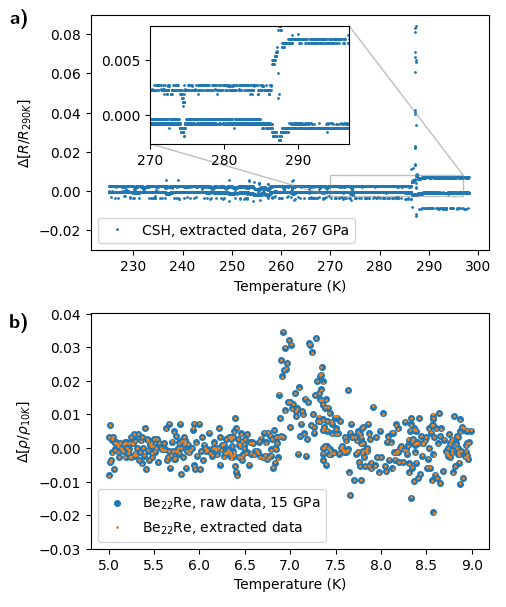

In [8]:
'''
Figure 5 of publication.
Difference plot.
New version with two panels.
'''

# Reversed row order.  The extracted data is in order of decreasing temperature.
# Here we reverse the order so that the difference has the same sign as would dR/dT.
dfMR = dfM[::-1].copy()

# Setup the overall plot
column_width = 1.5 * 3.375 # 1.5 * PRB journal column width
fig, ax = plt.subplots(2, figsize=(column_width, 1.2 * column_width))

ax[0].plot(
    dfMR['Temp'],
    dfMR['R'].diff(),
    'o',
    markersize=1,
    label='CSH, extracted data, 267 GPa'
)

axIns = ax[0].inset_axes([0.15, 0.45, 0.5, 0.5])
axIns.set_xlim(270, 297)
axIns.set_ylim(-0.0026, 0.008)
ax[0].indicate_inset_zoom(axIns, edgecolor='grey')

axIns.plot(
    dfMR['Temp'],
    dfMR['R'].diff(),
    'o',
    markersize=1
)

ax[0].set_ylim(-0.03, 0.09)
ax[0].set_xlabel('Temperature (K)')
ax[0].set_ylabel('$\Delta [R/R_{290 K}]$')
ax[0].legend(loc='lower left')

ax[1].plot(
    df_raw['T(K)'],
    df_raw.rho_n.diff(),
    'o',
    markersize=4,
    label='Be$_{22}$Re, raw data, 15 GPa'
)

ax[1].plot(
    df_ext.Temp,
    df_ext.rho_n.diff(),
    'o',
    markersize=1,
    label='Be$_{22}$Re, extracted data'
)

ax[1].set_ylim(-0.03, 0.04)
ax[1].set_xlabel('Temperature (K)')
ax[1].set_ylabel(r'$\Delta[\rho/\rho_{10 K}$]')
ax[1].legend()

fig.text(0.02, 0.96, r"\Large{\textbf{a)}}", usetex=True)
fig.text(0.02, 0.46, r"\Large{\textbf{b)}}", usetex=True)

fig.tight_layout()
plt.savefig(pathlib.Path.cwd().parent / 'publication_figures' / 'Fig05.pdf')

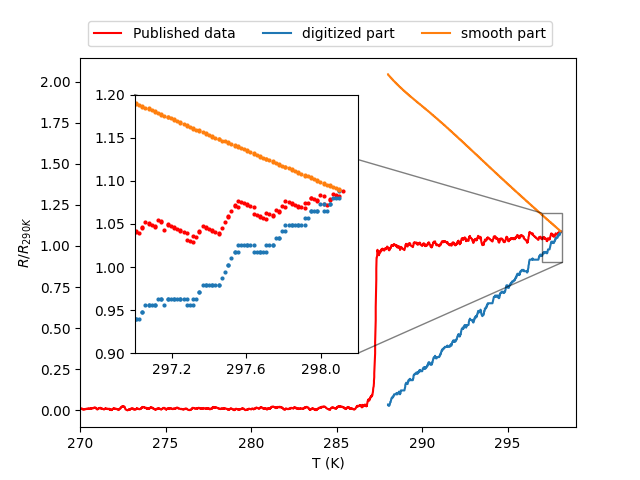

In [9]:
'''
Figure 6 of publication.
Comparison of published data with smooth and digitized components.
'''

# This scaling parameter dictionary is computed in 01_data_extraction.ipynb.
# I hard code it here so that this notebook can run independently of the
# 02_CSH-Fig2b_extract.ipynb notebook.
Fig2b_scale_dict = {
    'x': (487.09374723, 284.21875),
    'y': (60.7499443, -84.402401)
}

# unwrap the data.  This step corresponds to 0.0078 in axis units.
step = 0.943
# You can change the step size as below to see that the unwrapping
# produces noisy data with noise comparable to step when using
# Any other step size.
# step = 0.943 * 1.2 # Altered/incorrect step size.
Rstep = -1.2 * step / np.diff(Fig2b_scale_dict['y'])[0]
df = mag_dict['0'][1:].reset_index().drop('index', axis=1).copy()
df['dpH'] = vextract.unwrap.unwrap(pd.Series(df.index), df['R'], Rstep)
df['spH'] = df['R'] - df['dpH']

# Make the plot.
fig, ax = plt.subplots()
ax.set_xlim(270, 299)
axIns = ax.inset_axes([0.11, 0.2, 0.45, 0.7])
axIns.set_xlim(297, 298.2)
axIns.xaxis.set_major_locator(plt.MaxNLocator(3))
axIns.set_ylim(0.9, 1.2)
ax.indicate_inset_zoom(axIns, edgecolor="black")

ax.plot(df['Temp'][df['Temp'] > 270],
        df['R'][df['Temp'] > 270],
        markersize=2,
        color='red',
        label='Published data')
axIns.plot(df['Temp'][df['Temp'] > 270],
           df['R'][df['Temp'] > 270],
           'o',
           markersize=2,
           color='red')

ax.plot(df['Temp'][df['Temp'] > 288],
        (df['dpH']+df['R'][0])[df['Temp'] > 288],
        markersize=2,
        label='digitized part')
axIns.plot(df['Temp'][df['Temp'] > 288],
           (df['dpH']+df['R'][0])[df['Temp'] > 288],
           'o',
           markersize=2)

ax.plot(df['Temp'][df['Temp'] > 288],
        df['spH'][df['Temp'] > 288],
        markersize=2,
        label='smooth part')
axIns.plot(df['Temp'][df['Temp'] > 288],
           df['spH'][df['Temp'] > 288],
           'o',
           markersize=2)

ax.set_xlabel('T (K)')
ax.set_ylabel('$R/R_{290 K}$')

# ax.set_ylim(-1.1+df['R'][0], 1.5+df['R'][0])
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.97), ncol=3)
plt.savefig(pathlib.Path.cwd().parent / 'publication_figures' / 'Fig06.pdf')

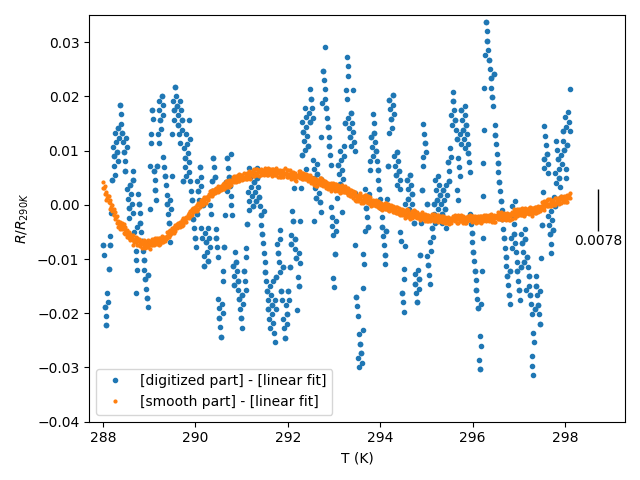

In [10]:
'''
Figure 7 from publication.
Smooth component of data minus linear fit.
'''

df = df[df['Temp'] > 288].dropna().copy()
coefsD = np.polyfit(df['Temp'], df['dpH'], 1)
coefsS = np.polyfit(df['Temp'], df['spH'], 1)
dp_line = np.poly1d(coefsD)
sp_line = np.poly1d(coefsS)

fig, ax = plt.subplots()
ax.set_xlabel('T (K)')
ax.set_ylabel('$R/R_{290 K}$')
ax.plot(df['Temp'][df['Temp'] > 288],
        df['dpH'][df['Temp'] > 288] - dp_line(df['Temp'][df['Temp'] > 288]),
        'o',
        markersize=3,
        label='[digitized part] - [linear fit]')

ax.plot(df['Temp'][df['Temp'] > 288],
        df['spH'][df['Temp'] > 288] - sp_line(df['Temp'][df['Temp'] > 288]),
        'o',
        markersize=2,
        label='[smooth part] - [linear fit]')
ax.set_xlim(287.7, 299.3)
ax.set_ylim(-0.04, 0.035)
bar = AnchoredSizeBar(ax.transData,
                      size=0,
                      label='0.0078',
                      loc='center right',
                      frameon=False,
                      size_vertical=0.0078)
ax.add_artist(bar)
ax.legend()
plt.tight_layout()
plt.savefig(pathlib.Path.cwd().parent / 'publication_figures' / 'Fig07.pdf')